In [2]:
from sklearn.model_selection import train_test_split

import pandas as pd

import numpy as np

from scipy.sparse import coo_matrix

from sklearn.neighbors import KernelDensity

from ifeatpro.features import get_feature, get_all_features

1. Get training data
2. Create training and validation set
3. Create molecular signature for train protein sequences
4. Get substrate molecular signature file
5. Get substrate molecular signature
6. Encode into a single vector
7. Train KDE model
8. Create random substrate-enzyme pairs
9. Evaluate model

In [2]:
# substrate encoding
subs_encoding_file= "./data/MolecularSignatureKEGGComp/mol_sig_matrix_kegg_comp.csv"

df_subs = pd.read_csv(subs_encoding_file, index_col=0).T

# Sequence Encoding

1. encode them as all ifeature encodings

In [3]:
help(get_feature)

Help on function get_feature in module ifeatpro.features:

get_feature(protein_fasta_file, feature_type, output_dir)
    A function to create numerically encoded feature of a specific type for protein sequences
    :param protein_fasta_file: The path to a file that contains all the protein sequences in fasta format
    :param feature_type: The feature encoding type. Must be one of the 21 types mentioned in README
    :param output_dir: The path to a directory where the feature encoded files will be stored
    :return: Name of the output file where the features are stored



In [ ]:
"""
moran
geary
nmbroto
ctdc
ctdt
ctdd
ctriad
ksctriad
socnumber
qsorder
paac
apaac
"""

get_feature("./data/training_fasta.fa", "moran", "./data/enz_ifeatures/")

Descriptor type: moran


In [5]:
# get_all_features("./data/training_fasta.fa", "./data/enz_ifeatures/")

In [6]:
train_filepath = "./data/training_raw.csv"
train_file = open(train_filepath, "r")

X_raw = []
for i,line in enumerate(train_file):
    name, seq, subs = line.strip().split(",")
    X_raw.append((name, seq, subs))


In [7]:
X_train, X_valid = train_test_split(X_raw, random_state=10)

In [8]:
# filter X_train and X_valid
X_train = [x for x in X_train if x[2] in df_subs.index]
X_valid = [x for x in X_valid if x[2] in df_subs.index]

In [9]:
len(X_train)

51994

In [10]:
len(X_valid)

17415

In [11]:
X_train_name = [x[0] for x in X_train]
X_train_seq = [x[1] for x in X_train]
X_train_subs = [x[2] for x in X_train]

X_valid_name = [x[0] for x in X_valid]
X_valid_seq = [x[1] for x in X_valid]
X_valid_subs = [x[2] for x in X_valid]

In [12]:
X_enc = pd.read_csv("./data/enz_ifeatures/dde.csv", index_col=0)

In [13]:
X_enc_train = X_enc.loc[X_train_name, :]
X_enc_valid = X_enc.loc[X_valid_name, :]

In [14]:
X_enc_train.head()

,AA,AC,AD,AE,AF,AG,AH,AI,AK,AL,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
#,,,,,,,,,,,,,,,,,,,,,
hsa:4976,-0.061009,-0.740270,-0.740270,2.048437,-0.043093,-1.541540,-0.740270,1.086292,-0.043093,0.731969,...,0.675085,-0.030455,-0.740270,1.940397,-1.191906,-1.191906,-0.740270,-1.437447,0.675085,0.954971
ggo:101128753,0.037596,-0.694715,-0.694715,-0.694715,0.747826,0.037596,0.747826,1.505623,-0.694715,-0.371230,...,-0.347077,-0.490973,-0.694715,-0.490973,-0.851307,0.327158,0.747826,-0.694715,2.535677,-0.490973
ptr:457477,0.442999,-0.568497,-0.568497,-0.568497,1.194317,-0.804844,2.957132,0.743469,-0.568497,1.053129,...,-0.284019,-0.401772,2.957132,-0.401772,-0.696639,0.743469,1.194317,-0.568497,-0.284019,2.089882
tac:Ta0619,3.387541,-0.787732,0.484469,0.484469,-0.787732,1.586435,-0.787732,-0.965291,-0.787732,0.104845,...,-0.393548,1.241485,1.756671,-0.556711,-0.965291,0.074017,0.484469,-0.787732,-0.393548,1.241485
pmex:H4W19_11290,3.525268,-0.392928,2.901909,4.549327,-1.216637,0.609874,2.078200,-1.490873,-1.216637,3.607328,...,-0.607827,0.304445,-0.392928,0.304445,-0.145036,-0.817955,0.430781,0.430781,-0.607827,-0.859829


In [15]:
len(X_enc_train), len(X_enc_valid)

(51994, 17415)

# Substrate Encoding

In [16]:
len(set(df_subs.index).intersection(set(X_train_subs)))

2178

In [17]:
len(set(X_train_subs))

2178

In [18]:
len(set(X_valid_subs)), len(set(df_subs.index).intersection(set(X_valid_subs)))

(1963, 1963)

In [19]:
df_subs.head()

,O,cN,cc(n)N,cc(c)n,cnc,ncn,cn(c)C,C[C@H](n)O,COC,C[C@H](C)O,...,[NH]N,[N]=N[NH],CC(=C)[N+],C/C(=C)N,co[nH],c[nH]o,CS(=c)[O-],CS(=c)O,[NH3+]CS,CC([n+])O
C00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C00002,0.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C00003,0.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C00004,0.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C00005,0.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
len(X_train_subs)

51994

In [21]:
X_train_subs[:5]

['C00001', 'C19586', 'C11088', 'C01286', 'C00565']

In [22]:
X_train_subs_molsig = df_subs.loc[X_train_subs, :]
X_valid_subs_molsig = df_subs.loc[X_valid_subs, :]

In [23]:
X_train_subs_molsig.head(2)

,O,cN,cc(n)N,cc(c)n,cnc,ncn,cn(c)C,C[C@H](n)O,COC,C[C@H](C)O,...,[NH]N,[N]=N[NH],CC(=C)[N+],C/C(=C)N,co[nH],c[nH]o,CS(=c)[O-],CS(=c)O,[NH3+]CS,CC([n+])O
C00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C19586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Training and Validation Concatenation of sequences and substrates

X_tr = np.concatenate((X_enc_train.values, X_train_subs_molsig.values), axis=1)
X_va = np.concatenate((X_enc_valid.values, X_valid_subs_molsig.values), axis=1)

In [25]:
X_tr.shape, X_va.shape

((51994, 1839), (17415, 1839))

In [26]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.35).fit(X_tr)

In [27]:
kde.score(X_tr[:40])

9201.602380817638

In [28]:
np.exp(kde.score_samples(X_va[300:350]))

array([3.63325713e+088, 1.29926260e-087, 2.09222438e+088, 1.10635832e+098,
       2.64340398e+086, 3.15253760e+094, 9.18900170e+088, 5.32113436e+092,
       7.39878546e+088, 3.10640065e+089, 0.00000000e+000, 1.06440807e+093,
       5.29580355e+094, 8.99935319e+090, 8.98853778e+090, 6.55426889e+099,
       1.12779218e+088, 8.98794150e+090, 1.96628083e+100, 8.35504192e+091,
       4.88683902e+006, 1.30969581e+041, 6.55426996e+099, 1.45840923e+084,
       2.82624853e+088, 6.32668511e+088, 1.17631340e+096, 7.19407471e+014,
       3.52229928e+072, 6.55426889e+099, 1.51614600e+089, 1.51615329e+089,
       6.55426889e+099, 5.94855460e+096, 3.11882924e+092, 1.31141403e+100,
       5.34724714e+053, 1.86751104e+096, 2.05083917e+088, 1.96628067e+100,
       1.51614600e+089, 1.87285618e+089, 1.46685579e+093, 2.76679041e+088,
       6.12102141e-073, 1.31085443e+100, 1.31085378e+100, 1.89421139e+088,
       6.55426996e+099, 4.31996221e+085])

In [29]:
scores_valid = np.exp(kde.score_samples(X_va))

# Validation Score statistics

In [30]:
def return_statistics(scores):
    return np.mean(scores), np.median(scores), np.std(scores), np.min(scores), np.max(scores)

In [31]:
return_statistics(scores_valid)

(2.8733076705381054e+99,
 1.5165779960624592e+89,
 6.854667900218262e+99,
 0.0,
 8.520549562843725e+100)

# Model Evaluation

## Entire feature space is derived from an uniform distribution

In [32]:
# Generating some random high dimensional data to see the scores on those samples
X_random_1 = np.random.rand(*X_va.shape)

In [33]:
scores_random_1 = kde.score_samples(X_random_1)

In [34]:
scores_random_1 = np.exp(scores_random_1)

In [35]:
return_statistics(scores_random_1)

(0.0, 0.0, 0.0, 0.0, 0.0)

## First 20 derived from uniform, last 1439 is a random int between 0 and 68

In [36]:
subs_feat_vals = X_va[:,20:].flatten()

In [37]:
subs_uniq_counts = np.unique(subs_feat_vals, return_counts=True)

In [38]:
X_random_2 = np.random.choice(subs_uniq_counts[0], p=subs_uniq_counts[1]/sum(subs_uniq_counts[1]), size=X_va[:,20:].shape)
X_random_2_tmp = np.random.rand(*X_va[:,:20].shape)
X_random_2 = np.concatenate((X_random_2_tmp, X_random_2), axis=1)

In [39]:
scores_random_2 = np.exp(kde.score_samples(X_random_2))

In [40]:
return_statistics(scores_random_2)

(2.253e-320, 0.0, 0.0, 0.0, 3.92306374e-316)

## Random enzyme-substrate pairs

In [41]:
X_va_enz = X_va[:,:20]
X_va_subs = X_va[:, 20:]

In [42]:
np.random.shuffle(X_va_subs)

In [43]:
np.random.shuffle(X_va_enz)

In [44]:
X_random_3 = np.concatenate((X_va_enz, X_va_subs), axis=1)

In [45]:
scores_random_3 = np.exp(kde.score_samples(X_random_3))

In [46]:
return_statistics(scores_random_3)

(7.527155534208148e+95,
 2.1671690844241843e+17,
 7.023485252882159e+97,
 0.0,
 6.554271946516604e+99)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

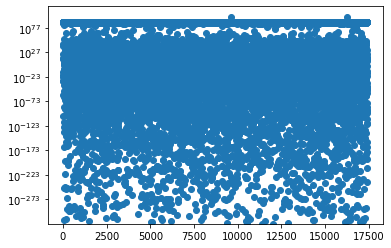

In [51]:
plt.scatter(range(len(scores_random_3)), scores_random_3)
plt.yscale("log")

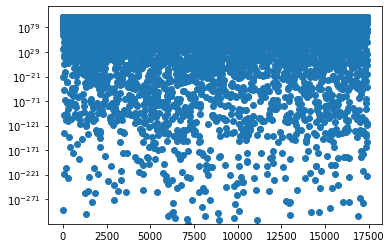

In [52]:
plt.scatter(range(len(scores_valid)), scores_valid)
plt.yscale("log")

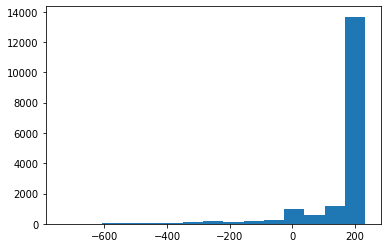

In [84]:
plt.hist([np.log(sv) if sv!=0 else sv for sv in scores_valid ], bins = 15);

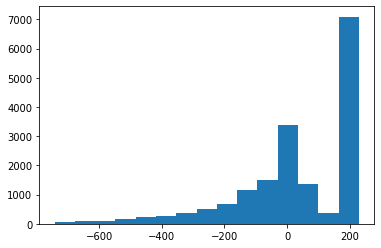

In [85]:
plt.hist([np.log(sr) if sr!=0 else sr for sr in scores_random_3 ], bins = 15);